In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_1='data/clinicaltrial_data.csv'
file_2='data/mouse_drug_data.csv'

In [3]:
c_trial_df=pd.read_csv(file_1)
m_drug_df=pd.read_csv(file_2)

In [4]:
c_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
m_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# merge two tables
c_drug_df=pd.merge(c_trial_df,m_drug_df,on='Mouse ID', how='outer')
c_drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [7]:
c_drug_df.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [8]:
c_drug_df['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [9]:
c_drug_df['Drug'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [10]:
time_tumor_drug_df=c_drug_df[['Timepoint','Tumor Volume (mm3)','Drug']]
time_tumor_drug_df.head()

,Timepoint,Tumor Volume (mm3),Drug
0,0,45.000000,Capomulin
1,5,45.651331,Capomulin
2,10,43.270852,Capomulin
3,15,43.784893,Capomulin
4,20,42.731552,Capomulin


In [11]:
#calculate mean tumor volumn at each timepoint for each treatment
#Capomulin
cap_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Capomulin']
groupby_cap_tt_df=cap_tt_df.groupby(['Timepoint'])
cap_avg_t=groupby_cap_tt_df['Tumor Volume (mm3)'].mean()
#Ketapril
ket_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Ketapril']
groupby_ket_tt_df=ket_tt_df.groupby(['Timepoint'])
ket_avg_t=groupby_ket_tt_df['Tumor Volume (mm3)'].mean()
#Naftisol
naf_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Naftisol']
groupby_naf_tt_df=naf_tt_df.groupby(['Timepoint'])
naf_avg_t=groupby_naf_tt_df['Tumor Volume (mm3)'].mean()
#Infubinol
inf_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Infubinol']
groupby_inf_tt_df=inf_tt_df.groupby(['Timepoint'])
inf_avg_t=groupby_inf_tt_df['Tumor Volume (mm3)'].mean()
#Stelasyn
ste_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Stelasyn']
groupby_ste_tt_df=ste_tt_df.groupby(['Timepoint'])
ste_avg_t=groupby_ste_tt_df['Tumor Volume (mm3)'].mean()
#Ramicane
ram_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Ramicane']
groupby_ram_tt_df=ram_tt_df.groupby(['Timepoint'])
ram_avg_t=groupby_ram_tt_df['Tumor Volume (mm3)'].mean()
#Propriva
pro_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Propriva']
groupby_pro_tt_df=pro_tt_df.groupby(['Timepoint'])
pro_avg_t=groupby_pro_tt_df['Tumor Volume (mm3)'].mean()
#Zoniferol
zon_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Zoniferol']
groupby_zon_tt_df=zon_tt_df.groupby(['Timepoint'])
zon_avg_t=groupby_zon_tt_df['Tumor Volume (mm3)'].mean()
#Placebo
pla_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Placebo']
groupby_pla_tt_df=pla_tt_df.groupby(['Timepoint'])
pla_avg_t=groupby_pla_tt_df['Tumor Volume (mm3)'].mean()
#Ceftamin
cef_tt_df=time_tumor_drug_df[time_tumor_drug_df['Drug']=='Ceftamin']
groupby_cef_tt_df=cef_tt_df.groupby(['Timepoint'])
cef_avg_t=groupby_cef_tt_df['Tumor Volume (mm3)'].mean()

In [12]:
#calculate sem for each treatment
cap_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
ket_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
naf_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
inf_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
ste_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
ram_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
pro_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
zon_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
pla_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()
cef_sem_t=groupby_cap_tt_df['Tumor Volume (mm3)'].sem()

In [13]:
# create a new table containing mean tumor volumn and sem at each time point for each treatment and reset index
# capomulin
cap_tumor_df=pd.DataFrame({'Mean Tumor Volumn':cap_avg_t, 'sem':cap_sem_t})
cap_tumor_df.reset_index(inplace=True,drop=False)
# ketapril
ket_tumor_df=pd.DataFrame({'Mean Tumor Volumn':ket_avg_t, 'sem':ket_sem_t})
ket_tumor_df.reset_index(inplace=True,drop=False)
#naftisol
naf_tumor_df=pd.DataFrame({'Mean Tumor Volumn':naf_avg_t, 'sem':naf_sem_t})
naf_tumor_df.reset_index(inplace=True,drop=False)
#infubinol
inf_tumor_df=pd.DataFrame({'Mean Tumor Volumn':inf_avg_t, 'sem':inf_sem_t})
inf_tumor_df.reset_index(inplace=True,drop=False)
#stelasyn
ste_tumor_df=pd.DataFrame({'Mean Tumor Volumn':ste_avg_t, 'sem':ste_sem_t})
ste_tumor_df.reset_index(inplace=True,drop=False)
#ramicane
ram_tumor_df=pd.DataFrame({'Mean Tumor Volumn':ram_avg_t, 'sem':ram_sem_t})
ram_tumor_df.reset_index(inplace=True,drop=False)
#propriva
pro_tumor_df=pd.DataFrame({'Mean Tumor Volumn':pro_avg_t, 'sem':pro_sem_t})
pro_tumor_df.reset_index(inplace=True,drop=False)
#zoniferol
zon_tumor_df=pd.DataFrame({'Mean Tumor Volumn':zon_avg_t, 'sem':zon_sem_t})
zon_tumor_df.reset_index(inplace=True,drop=False)
#placebo
pla_tumor_df=pd.DataFrame({'Mean Tumor Volumn':pla_avg_t, 'sem':pla_sem_t})
pla_tumor_df.reset_index(inplace=True,drop=False)
#ceftamin
cef_tumor_df=pd.DataFrame({'Mean Tumor Volumn':cef_avg_t, 'sem':cef_sem_t})
cef_tumor_df.reset_index(inplace=True,drop=False)

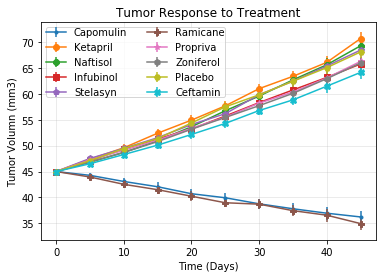

In [14]:
plt.errorbar(cap_tumor_df['Timepoint'],cap_tumor_df['Mean Tumor Volumn'],yerr=cap_tumor_df['sem'],marker='.',label='Capomulin')
plt.errorbar(ket_tumor_df['Timepoint'],ket_tumor_df['Mean Tumor Volumn'],yerr=ket_tumor_df['sem'],marker='o',label='Ketapril')
plt.errorbar(naf_tumor_df['Timepoint'],naf_tumor_df['Mean Tumor Volumn'],yerr=naf_tumor_df['sem'],marker='8',label='Naftisol')
plt.errorbar(inf_tumor_df['Timepoint'],inf_tumor_df['Mean Tumor Volumn'],yerr=inf_tumor_df['sem'],marker='s',label='Infubinol')
plt.errorbar(ste_tumor_df['Timepoint'],ste_tumor_df['Mean Tumor Volumn'],yerr=ste_tumor_df['sem'],marker='p',label='Stelasyn')
plt.errorbar(ram_tumor_df['Timepoint'],ram_tumor_df['Mean Tumor Volumn'],yerr=ram_tumor_df['sem'],marker='P',label='Ramicane')
plt.errorbar(pro_tumor_df['Timepoint'],pro_tumor_df['Mean Tumor Volumn'],yerr=pro_tumor_df['sem'],marker='*',label='Propriva')
plt.errorbar(zon_tumor_df['Timepoint'],zon_tumor_df['Mean Tumor Volumn'],yerr=zon_tumor_df['sem'],marker='h',label='Zoniferol')
plt.errorbar(pla_tumor_df['Timepoint'],pla_tumor_df['Mean Tumor Volumn'],yerr=pla_tumor_df['sem'],marker='H',label='Placebo')
plt.errorbar(cef_tumor_df['Timepoint'],cef_tumor_df['Mean Tumor Volumn'],yerr=cef_tumor_df['sem'],marker='X',label='Ceftamin')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volumn (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(alpha=0.3)
plt.legend(loc='best',ncol=2,borderpad=0.001)
plt.savefig('tumor_response_to_treatment.png',dpi=1200)

In [15]:
time_ms_drug_df=c_drug_df[['Timepoint','Metastatic Sites','Drug']]
time_ms_drug_df.head()

,Timepoint,Metastatic Sites,Drug
0,0,0,Capomulin
1,5,0,Capomulin
2,10,0,Capomulin
3,15,0,Capomulin
4,20,0,Capomulin


In [16]:
#calculate mean Metastatic Sites at each timepoint for each treatment
#Capomulin
cap_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Capomulin']
groupby_cap_mst_df=cap_mst_df.groupby(['Timepoint'])
cap_avg_ms=groupby_cap_mst_df['Metastatic Sites'].mean()
#Ketapril
ket_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Ketapril']
groupby_ket_mst_df=ket_mst_df.groupby(['Timepoint'])
ket_avg_ms=groupby_ket_mst_df['Metastatic Sites'].mean()
#Naftisol
naf_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Naftisol']
groupby_naf_mst_df=naf_mst_df.groupby(['Timepoint'])
naf_avg_ms=groupby_naf_mst_df['Metastatic Sites'].mean()
#Infubinol
inf_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Infubinol']
groupby_inf_mst_df=inf_mst_df.groupby(['Timepoint'])
inf_avg_ms=groupby_inf_mst_df['Metastatic Sites'].mean()
#Stelasyn
ste_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Stelasyn']
groupby_ste_mst_df=ste_mst_df.groupby(['Timepoint'])
ste_avg_ms=groupby_ste_mst_df['Metastatic Sites'].mean()
#Ramicane
ram_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Ramicane']
groupby_ram_mst_df=ram_mst_df.groupby(['Timepoint'])
ram_avg_ms=groupby_ram_mst_df['Metastatic Sites'].mean()
#Propriva
pro_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Propriva']
groupby_pro_mst_df=pro_mst_df.groupby(['Timepoint'])
pro_avg_ms=groupby_pro_mst_df['Metastatic Sites'].mean()
#Zoniferol
zon_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Zoniferol']
groupby_zon_mst_df=zon_mst_df.groupby(['Timepoint'])
zon_avg_ms=groupby_zon_mst_df['Metastatic Sites'].mean()
#Placebo
pla_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Placebo']
groupby_pla_mst_df=pla_mst_df.groupby(['Timepoint'])
pla_avg_ms=groupby_pla_mst_df['Metastatic Sites'].mean()
#Ceftamin
cef_mst_df=time_ms_drug_df[time_ms_drug_df['Drug']=='Ceftamin']
groupby_cef_mst_df=cef_mst_df.groupby(['Timepoint'])
cef_avg_ms=groupby_cef_mst_df['Metastatic Sites'].mean()

In [17]:
#calculate sem for each treatment
cap_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
ket_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
naf_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
inf_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
ste_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
ram_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
pro_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
zon_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
pla_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()
cef_sem_ms=groupby_cap_mst_df['Metastatic Sites'].sem()

In [18]:
# create a new table containing Metastatic Sites and sem at each time point for each treatment and reset index
# capomulin
cap_ms_df=pd.DataFrame({'Metastatic Sites':cap_avg_ms, 'sem':cap_sem_ms})
cap_ms_df.reset_index(inplace=True,drop=False)
# ketapril
ket_ms_df=pd.DataFrame({'Metastatic Sites':ket_avg_ms, 'sem':ket_sem_ms})
ket_ms_df.reset_index(inplace=True,drop=False)
#naftisol
naf_ms_df=pd.DataFrame({'Metastatic Sites':naf_avg_ms, 'sem':naf_sem_ms})
naf_ms_df.reset_index(inplace=True,drop=False)
#infubinol
inf_ms_df=pd.DataFrame({'Metastatic Sites':inf_avg_ms, 'sem':inf_sem_ms})
inf_ms_df.reset_index(inplace=True,drop=False)
#stelasyn
ste_ms_df=pd.DataFrame({'Metastatic Sites':ste_avg_ms, 'sem':ste_sem_ms})
ste_ms_df.reset_index(inplace=True,drop=False)
#ramicane
ram_ms_df=pd.DataFrame({'Metastatic Sites':ram_avg_ms, 'sem':ram_sem_ms})
ram_ms_df.reset_index(inplace=True,drop=False)
#propriva
pro_ms_df=pd.DataFrame({'Metastatic Sites':pro_avg_ms, 'sem':pro_sem_ms})
pro_ms_df.reset_index(inplace=True,drop=False)
#zoniferol
zon_ms_df=pd.DataFrame({'Metastatic Sites':zon_avg_ms, 'sem':zon_sem_ms})
zon_ms_df.reset_index(inplace=True,drop=False)
#placebo
pla_ms_df=pd.DataFrame({'Metastatic Sites':pla_avg_ms, 'sem':pla_sem_ms})
pla_ms_df.reset_index(inplace=True,drop=False)
#ceftamin
cef_ms_df=pd.DataFrame({'Metastatic Sites':cef_avg_ms, 'sem':cef_sem_ms})
cef_ms_df.reset_index(inplace=True,drop=False)

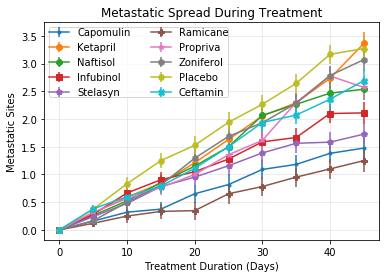

In [19]:
plt.clf()
plt.errorbar(cap_ms_df['Timepoint'],cap_ms_df['Metastatic Sites'],yerr=cap_ms_df['sem'],marker='.',label='Capomulin')
plt.errorbar(ket_ms_df['Timepoint'],ket_ms_df['Metastatic Sites'],yerr=ket_ms_df['sem'],marker='o',label='Ketapril')
plt.errorbar(naf_ms_df['Timepoint'],naf_ms_df['Metastatic Sites'],yerr=naf_ms_df['sem'],marker='8',label='Naftisol')
plt.errorbar(inf_ms_df['Timepoint'],inf_ms_df['Metastatic Sites'],yerr=inf_ms_df['sem'],marker='s',label='Infubinol')
plt.errorbar(ste_ms_df['Timepoint'],ste_ms_df['Metastatic Sites'],yerr=ste_ms_df['sem'],marker='p',label='Stelasyn')
plt.errorbar(ram_ms_df['Timepoint'],ram_ms_df['Metastatic Sites'],yerr=ram_ms_df['sem'],marker='P',label='Ramicane')
plt.errorbar(pro_ms_df['Timepoint'],pro_ms_df['Metastatic Sites'],yerr=pro_ms_df['sem'],marker='*',label='Propriva')
plt.errorbar(zon_ms_df['Timepoint'],zon_ms_df['Metastatic Sites'],yerr=zon_ms_df['sem'],marker='h',label='Zoniferol')
plt.errorbar(pla_ms_df['Timepoint'],pla_ms_df['Metastatic Sites'],yerr=pla_ms_df['sem'],marker='H',label='Placebo')
plt.errorbar(cef_ms_df['Timepoint'],cef_ms_df['Metastatic Sites'],yerr=cef_ms_df['sem'],marker='X',label='Ceftamin')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(alpha=0.3)
plt.legend(loc='best',ncol=2,borderpad=0.001)
plt.savefig('metastatic_spread_during_treatment.png',dpi=1200)

In [20]:
mouse_df=c_drug_df[['Timepoint','Mouse ID','Drug']]
mouse_df.head()

,Timepoint,Mouse ID,Drug
0,0,b128,Capomulin
1,5,b128,Capomulin
2,10,b128,Capomulin
3,15,b128,Capomulin
4,20,b128,Capomulin


In [21]:
# calculate survived mounse count for each treatment at different time points
# capomulin
cap_mouse_df=mouse_df[mouse_df['Drug']=='Capomulin']
cap_m_group=cap_mouse_df.groupby(['Timepoint'])
cap_survive=cap_m_group['Mouse ID'].count()
#ketapril
ket_mouse_df=mouse_df[mouse_df['Drug']=='Ketapril']
ket_m_group=ket_mouse_df.groupby(['Timepoint'])
ket_survive=ket_m_group['Mouse ID'].count()
#naftisol
naf_mouse_df=mouse_df[mouse_df['Drug']=='Naftisol']
naf_m_group=naf_mouse_df.groupby(['Timepoint'])
naf_survive=naf_m_group['Mouse ID'].count()
#infubinol
inf_mouse_df=mouse_df[mouse_df['Drug']=='Infubinol']
inf_m_group=inf_mouse_df.groupby(['Timepoint'])
inf_survive=inf_m_group['Mouse ID'].count()
#stelasyn
ste_mouse_df=mouse_df[mouse_df['Drug']=='Stelasyn']
ste_m_group=ste_mouse_df.groupby(['Timepoint'])
ste_survive=ste_m_group['Mouse ID'].count()
#ramicane
ram_mouse_df=mouse_df[mouse_df['Drug']=='Ramicane']
ram_m_group=ram_mouse_df.groupby(['Timepoint'])
ram_survive=ram_m_group['Mouse ID'].count()
#propriva
pro_mouse_df=mouse_df[mouse_df['Drug']=='Propriva']
pro_m_group=pro_mouse_df.groupby(['Timepoint'])
pro_survive=pro_m_group['Mouse ID'].count()
#zoniferol
zon_mouse_df=mouse_df[mouse_df['Drug']=='Zoniferol']
zon_m_group=zon_mouse_df.groupby(['Timepoint'])
zon_survive=zon_m_group['Mouse ID'].count()
#placebo
pla_mouse_df=mouse_df[mouse_df['Drug']=='Placebo']
pla_m_group=pla_mouse_df.groupby(['Timepoint'])
pla_survive=pla_m_group['Mouse ID'].count()
#ceftamin
cef_mouse_df=mouse_df[mouse_df['Drug']=='Ceftamin']
cef_m_group=cef_mouse_df.groupby(['Timepoint'])
cef_survive=cef_m_group['Mouse ID'].count()

In [22]:
#create a table containing timepoints and drug the content is surviv count
survive_df=pd.DataFrame({'Capomulin':cap_survive,
                       'Ketapril':ket_survive,
                       'Naftisol':naf_survive,
                       'Infubinol':inf_survive,
                       'Stelasyn':ste_survive,
                       'Ramicane':ram_survive,
                       'Propriva':pro_survive,
                       'Zoniferol':zon_survive,
                       'Placebo':pla_survive,
                       'Ceftamin':cef_survive})
survive_df.reset_index(inplace=True,drop=False)
survive_df

,Timepoint,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
0,0,25,25,25,25,26,25,26,25,25,25
1,5,25,23,23,25,25,25,25,24,24,21
2,10,25,22,21,21,23,24,23,22,24,20
3,15,24,19,21,21,23,24,17,21,20,19
4,20,23,19,20,20,21,23,17,17,19,18
5,25,22,19,18,18,19,23,14,16,17,18
6,30,22,18,15,17,18,23,13,15,15,16
7,35,22,17,15,12,16,21,10,14,14,14
8,40,21,15,15,10,12,20,9,14,12,14
9,45,21,11,13,9,11,20,7,14,11,13


In [23]:
survival_rate_df=survive_df.copy()
survival_rate_df['Capomulin']=survival_rate_df['Capomulin']/survival_rate_df.iloc[0,1]*100
survival_rate_df['Ketapril']=survival_rate_df['Ketapril']/survival_rate_df.iloc[0,2]*100
survival_rate_df['Naftisol']=survival_rate_df['Naftisol']/survival_rate_df.iloc[0,3]*100
survival_rate_df['Infubinol']=survival_rate_df['Infubinol']/survival_rate_df.iloc[0,4]*100
survival_rate_df['Stelasyn']=survival_rate_df['Stelasyn']/survival_rate_df.iloc[0,5]*100
survival_rate_df['Ramicane']=survival_rate_df['Ramicane']/survival_rate_df.iloc[0,6]*100
survival_rate_df['Propriva']=survival_rate_df['Propriva']/survival_rate_df.iloc[0,7]*100
survival_rate_df['Zoniferol']=survival_rate_df['Zoniferol']/survival_rate_df.iloc[0,8]*100
survival_rate_df['Placebo']=survival_rate_df['Placebo']/survival_rate_df.iloc[0,9]*100
survival_rate_df['Ceftamin']=survival_rate_df['Ceftamin']/survival_rate_df.iloc[0,10]*100
survival_rate_df.round()

,Timepoint,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,5,100.0,92.0,92.0,100.0,96.0,100.0,96.0,96.0,96.0,84.0
2,10,100.0,88.0,84.0,84.0,88.0,96.0,88.0,88.0,96.0,80.0
3,15,96.0,76.0,84.0,84.0,88.0,96.0,65.0,84.0,80.0,76.0
4,20,92.0,76.0,80.0,80.0,81.0,92.0,65.0,68.0,76.0,72.0
5,25,88.0,76.0,72.0,72.0,73.0,92.0,54.0,64.0,68.0,72.0
6,30,88.0,72.0,60.0,68.0,69.0,92.0,50.0,60.0,60.0,64.0
7,35,88.0,68.0,60.0,48.0,62.0,84.0,38.0,56.0,56.0,56.0
8,40,84.0,60.0,60.0,40.0,46.0,80.0,35.0,56.0,48.0,56.0
9,45,84.0,44.0,52.0,36.0,42.0,80.0,27.0,56.0,44.0,52.0


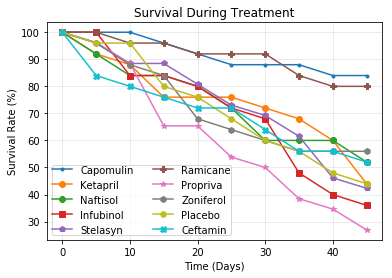

In [24]:
plt.clf()
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Capomulin'],marker='.',label='Capomulin')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Ketapril'],marker='o',label='Ketapril')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Naftisol'],marker='8',label='Naftisol')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Infubinol'],marker='s',label='Infubinol')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Stelasyn'],marker='p',label='Stelasyn')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Ramicane'],marker='P',label='Ramicane')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Propriva'],marker='*',label='Propriva')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Zoniferol'],marker='h',label='Zoniferol')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Placebo'],marker='H',label='Placebo')
plt.plot(survival_rate_df['Timepoint'],survival_rate_df['Ceftamin'],marker='X',label='Ceftamin')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid(alpha=0.3)
plt.legend(loc='best',ncol=2,borderpad=0.001)
plt.savefig('survival_during_treatment.png',dpi=1200)

In [25]:
cap_tumor_df

,Timepoint,Mean Tumor Volumn,sem
0,0,45.000000,0.000000
1,5,44.266086,0.448593
2,10,43.084291,0.702684
3,15,42.064317,0.838617
4,20,40.716325,0.909731
5,25,39.939528,0.881642
6,30,38.769339,0.934460
7,35,37.816839,1.052241
8,40,36.958001,1.223608
9,45,36.236114,1.223977


In [26]:
#calculate tumor change= mean total tumor volumn at 45 minus that at 0
cap_pct=(cap_tumor_df.iloc[9,1]-cap_tumor_df.iloc[0,1])/cap_tumor_df.iloc[0,1]*100
ket_pct=(ket_tumor_df.iloc[9,1]-ket_tumor_df.iloc[0,1])/ket_tumor_df.iloc[0,1]*100
naf_pct=(naf_tumor_df.iloc[9,1]-naf_tumor_df.iloc[0,1])/naf_tumor_df.iloc[0,1]*100
inf_pct=(inf_tumor_df.iloc[9,1]-inf_tumor_df.iloc[0,1])/inf_tumor_df.iloc[0,1]*100
ste_pct=(ste_tumor_df.iloc[9,1]-ste_tumor_df.iloc[0,1])/ste_tumor_df.iloc[0,1]*100
ram_pct=(ram_tumor_df.iloc[9,1]-ram_tumor_df.iloc[0,1])/ram_tumor_df.iloc[0,1]*100
pro_pct=(pro_tumor_df.iloc[9,1]-pro_tumor_df.iloc[0,1])/pro_tumor_df.iloc[0,1]*100
zon_pct=(zon_tumor_df.iloc[9,1]-zon_tumor_df.iloc[0,1])/zon_tumor_df.iloc[0,1]*100
pla_pct=(pla_tumor_df.iloc[9,1]-pla_tumor_df.iloc[0,1])/pla_tumor_df.iloc[0,1]*100
cef_pct=(cef_tumor_df.iloc[9,1]-cef_tumor_df.iloc[0,1])/cef_tumor_df.iloc[0,1]*100

In [27]:
tv_change_df=pd.DataFrame({'Drug':['Capomulin','Ketapril','Naftisol','Infubinol',
                                                   'Stelasyn','Ramicane','Propriva','Zoniferol','Placebo','Ceftamin'],
                                          'Tumor Volumn Change (%)':[cap_pct,ket_pct,naf_pct,inf_pct,ste_pct,ram_pct,
                                                                    pro_pct,zon_pct,pla_pct,cef_pct]})
tv_change_df

,Drug,Tumor Volumn Change (%)
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
5,Ramicane,-22.320900
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


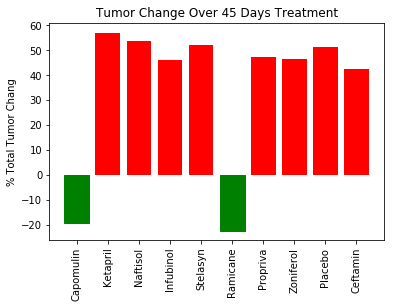

In [29]:
plt.clf()
barplot=plt.bar(tv_change_df['Drug'],tv_change_df['Tumor Volumn Change (%)'],color='red')
# set the color 1st bar (index 0) and the 5th bar (index 5) to green
barplot[0].set_color('green')
barplot[5].set_color('green')
plt.xticks(rotation='vertical')
plt.ylabel('% Total Tumor Chang')
plt.title('Tumor Change Over 45 Days Treatment')
plt.savefig('tumor_change_over_treatment.png',dpi=1200)